# Gaussian processes

Author: <alberto.suarez@uam.es>

## Simulation of Gaussian processes in 1 D

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from scipy import stats
import gaussian_processes as gp

import stochastic_plots as stoch
import matplotlib.pyplot as plt

### Simulation of a standard Brownian Bridge process

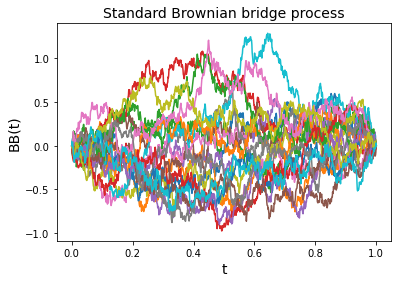

In [11]:
# Define the mean and covariance functions for the GP
def mean_fn(t):  
    return np.zeros(np.shape(t))

def BB_kernel(s,t): 
    return (np.minimum(s,t) - s * t)

##  Simulation

M = 20 # Number of simulated trajectories

t0, t1 = (0.0, 1.0) # interval for the simulation

N  = 1000   
t = np.linspace(t0, t1, N) # dicretization grid

BB, mean_vector, kernel_matrix = gp.simulate_gp(t, mean_fn, BB_kernel, M)

fontsize = 14
fig, ax = plt.subplots(1, 1)
ax.plot(t, BB.T)
_ = ax.set_xlabel('t', fontsize=fontsize)
_ = ax.set_ylabel('BB(t)', fontsize=fontsize) 
_ = ax.set_title('Standard Brownian bridge process', fontsize=fontsize)

## Simulation of Brownian motion

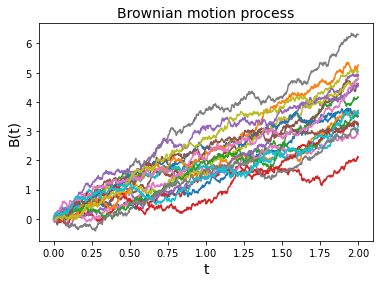

In [3]:
# Define the mean and convariance functions for the GP
def mean_fn(t, mu=2.0):  
    return mu*t

def BM_kernel(s,t, sigma=0.5): 
    return sigma*np.minimum(s,t) 

##  Simulation

M = 20 # Number of simulated trajectories

t0, t1 = (0.0, 2.0) # interval for the simualation

N  = 1000   
t = np.linspace(t0, t1, N) # monitorization points

B, mean_vector, kernel_matrix = gp.simulate_gp(t, mean_fn, BM_kernel, M)

fig, ax = plt.subplots(1, 1)
ax.plot(t, B.T)
_ = ax.set_xlabel('t', fontsize=fontsize)
_ = ax.set_ylabel('B(t)', fontsize=fontsize)
_ = ax.set_title('Brownian motion process', fontsize=fontsize)

## Spectral properties of standard Brownian motion

In [4]:
# Define the mean and covariance functions for the GP
def mean_fn(t):  
    return np.zeros(np.shape(t))

def BM_kernel(s,t): 
    return np.minimum(s,t) 

##  Simulation

M = 10000 # Number of simulated trajectories

t0, t1 = (0.0, 1.0) # interval for the simualation

N  = 1000   
t = np.linspace(t0, t1, N) # dicretization grid

B, mean_vector, kernel_matrix = gp.simulate_gp(t, mean_fn, BM_kernel, M)


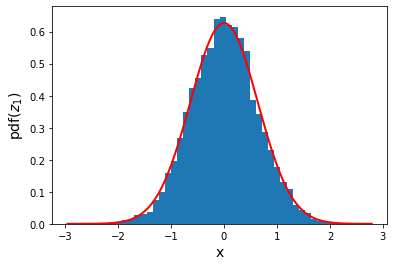

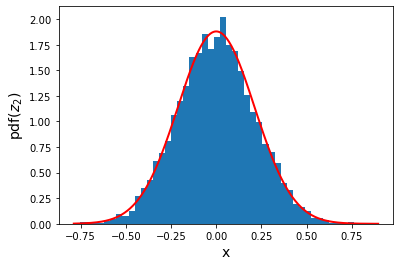

In [5]:
from scipy.integrate import simps

# Eigenfunctions and eigenvalues of the standard BM kernel operator
def phi_n(t, n): 
    return  (np.sqrt(2) * np.sin(0.5 * (2.0*n - 1.0) * np.pi * t))

def lambda_n(n): 
    return (2.0 / (2.0*n -1.0) / np.pi)**2

z_1 = np.zeros(M)
z_2 = np.zeros(M)

for m in range(M):
    # Projections of the Bownian trajectories onto the first eignefunction
    integrand_1 =  phi_n(t,1) * B[m]   
    z_1[m] = simps(integrand_1,t) 

    # Projections of the Bownian trajectories onto the second eignefunction
    integrand_2 =  phi_n(t,2) * B[m]   
    z_2[m] = simps(integrand_2,t)

def pdf(z): 
    return stats.norm.pdf(z, 0.0, np.sqrt(lambda_n(1)))

fig, ax = stoch.plot_pdf(z_1, pdf, fontsize=fontsize, fig_num=1)
_ = ax.set_ylabel('pdf($z_1$)', fontsize=fontsize) 

def pdf(z): 
    return stats.norm.pdf(z, 0.0, np.sqrt(lambda_n(2)))

fig, ax = stoch.plot_pdf(z_2, pdf, fontsize=fontsize, fig_num=2)
_ = ax.set_ylabel('pdf($z_2$)', fontsize=fontsize) 

[[1.         0.00351188]
 [0.00351188 1.        ]]


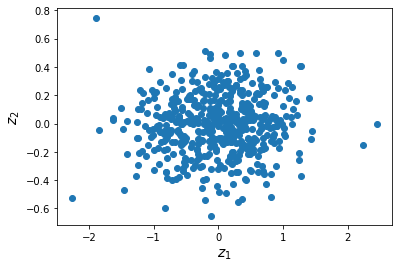

In [6]:
# Illustration of the independence of the projections

print(np.corrcoef(z_1, z_2))

n_plot = 500
_ = plt.scatter(z_1[:n_plot], z_2[:n_plot])
_ = plt.xlabel('$z_1$', fontsize=fontsize)
_ = plt.ylabel('$z_2$', fontsize=fontsize)

In [7]:
print(np.round(np.cov(z_1,z_2), 4))
print('lambda_1 = {:.4f} \t lambda_2 = {:.4f}'.format(lambda_n(1), lambda_n(2)))

[[0.3966 0.0005]
 [0.0005 0.0459]]
lambda_1 = 0.4053 	 lambda_2 = 0.0450


### Simulation of a GP with an RBF kernel

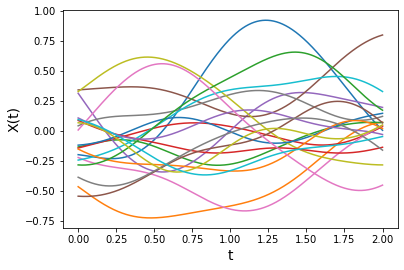

In [8]:
# Define the mean and covariance functions for the GP
def mean_fn(t, mu=2.0):  
    return np.zeros(np.shape(t))

def kernel_fn(s, t, sigma_2=0.1, gamma=0.5): 
    return sigma_2*np.exp(- 0.5 * ((s-t) / gamma)**2) 

##  Simulation

M = 20 # Number of simulated trajectories

t0, t1 = (0.0, 2.0) # interval for the simualation

N  = 1000
t = np.linspace(t0, t1, N) # dicretization grid

X, mean_vector, kernel_matrix = gp.simulate_gp(t, mean_fn, kernel_fn, M)

fig, ax = plt.subplots(1, 1)
ax.plot(t, X.T)
_ = ax.set_xlabel('t', fontsize=fontsize)
_ = ax.set_ylabel('X(t)', fontsize=fontsize) 

### Simulation of a GP with an exponential kernel (Ornstein-Uhlenbeck)

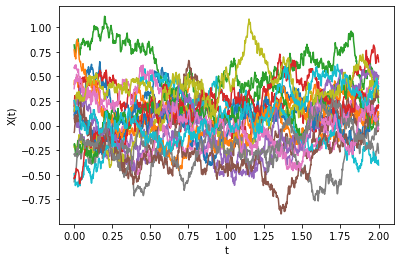

In [9]:
# Define the mean and covariance functions for the GP
def mean_fn(t, mu=2.0):  return np.zeros(np.shape(t))
def kernel_fn(s,t, sigma_2=0.1, gamma = 0.5): return sigma_2*np.exp(- np.abs(s-t) / gamma) 

##  Simulation

M = 20 # Number of simulated trajectories

t0, t1 = (0.0, 2.0) # interval for the simualation

N  = 1000  
t = np.linspace(t0, t1, N) # monitorization points

X, mean_vector, kernel_matrix = gp.simulate_gp(t, mean_fn, kernel_fn, M)

plt.plot(t, X.T)
_ = plt.xlabel('t')
_ = plt.ylabel('X(t)') 

## Simulation of a GP given some observations

(1000,)
(4,)


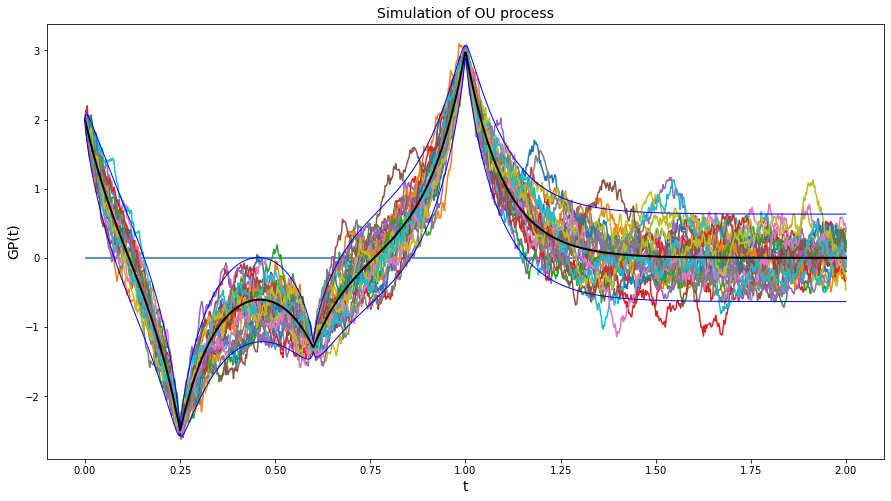

In [42]:
# Define the mean and convariance functions for the GP.

def mean_fn(t, mu=1.0):  
    return np.zeros(np.shape(t))

def kernel_fn(s,t, sigma_2=0.1, gamma=0.1): 
    return sigma_2*np.exp(- np.abs(s-t) / gamma)

M = 30 # Number of simulated trajectories.

t0, t1 = (0.0, 2.0) # Simulation interval.
N = 1000
t = np.linspace(t0, t1, N) # Monitorization grid.

t_obs = np.array([0.0, 0.25, 0.6, 1.0])
x_obs = np.array([2.0, -2.5, -1.3, 3.0])

X, mean_vector, kernel_matrix = gp.simulate_conditional_gp(
    t, 
    t_obs, 
    x_obs,
    mean_fn, 
    kernel_fn,
    M,
)

n_plot = 30
fig, ax = plt.subplots(1, 1, figsize=(15,8))
_ = ax.plot(t, X[:n_plot,:].T)
_ = ax.plot(t, mean_vector, color='k', linewidth=2)
a = 2.0
std_vector = np.sqrt(np.diag(kernel_matrix))
_ = ax.plot(t, mean_vector - a*std_vector, t, mean_vector + a*std_vector, color = 'b', linewidth = 1)
_ = ax.hlines(0.0, t.min(), t.max())
_ = ax.set_xlabel('t', fontsize=fontsize)
_ = ax.set_ylabel('GP(t)', fontsize=fontsize) 
_ = ax.set_title('Simulation of OU process', fontsize=fontsize) 



### More info on different types of kernels

https://peterroelants.github.io/posts/gaussian-process-kernels/


## Gaussian process regression

(5, 5)
(5, 1000)
(1000, 1000)
(1000,)
(1000, 1000)


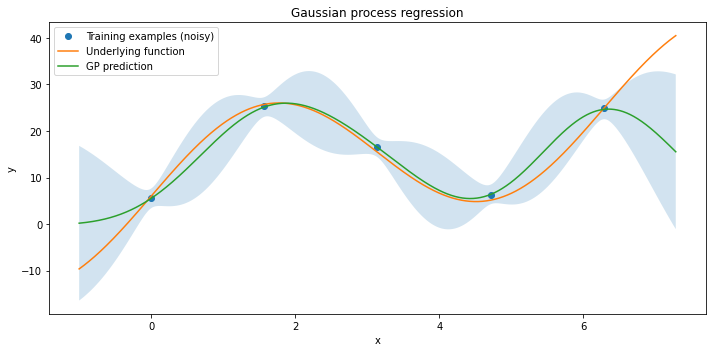

In [48]:
## Training data

def underlying_fn(x):
    return 3.0*(2.0 + x + 5*np.sin(x))

x_inf = 0.0
x_sup = 2.0 * np.pi

n_train = 5

## Uniform grid: U[x_inf, x_sup]
# X_train = x_inf + np.random.rand(n_train)*(x_sup-x_inf) 

## Regular grid: U[x_inf, x_sup]
X_train = np.linspace(x_inf, x_sup, n_train) 
y_train = underlying_fn(X_train) 

## Output contaminated by noise 
sigma_noise_fn = 1.0
noise_fn = sigma_noise_fn * np.random.randn(*np.shape(X_train))

y_train = y_train + noise_fn

X_train = X_train[:, np.newaxis]

## Test set
x_inf = x_inf - 1.0
x_sup = x_sup + 1.0
n_test = 1000
X_test = np.linspace(x_inf, x_sup, n_test)
X_test = X_test[:, np.newaxis]

## GP parameters 

# GP Kernel
output_variance = 50.0
length_scale =  1.0
def kernel (X, X_prime):
    return gp.rbf_kernel(X, X_prime, output_variance, length_scale)

# Regularization parameter
sigma2_noise = 0.5

# Predictions at test examples
y_test_predicted, y_test_predicted_covariance = gp.gp_regression(
    X_train, 
    y_train, 
    X_test, 
    kernel, 
    sigma2_noise,
)

# Plot undeerlying function + prediction + uncertainty intervals.
y_test_predicted_stdev = np.sqrt(np.diag(y_test_predicted_covariance))
a = 3.0  # Determines the width of the confidence band. 
y_test_predicted_up = y_test_predicted + a*y_test_predicted_stdev
y_test_predicted_bottom = y_test_predicted - a*y_test_predicted_stdev

fig, ax = plt.subplots(1, figsize=(10, 5))

ax.plot(X_train, y_train,'o', label='Training examples (noisy)')
ax.plot(X_test, underlying_fn(X_test), label='Underlying function')
ax.plot(X_test, y_test_predicted, label='GP prediction')
ax.fill_between(np.ravel(X_test), y_test_predicted_bottom, y_test_predicted_up, alpha=0.2)

ax.set_title('Gaussian process regression')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.tight_layout()

_ = plt.show()